In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

# Download 1 year of Apple stock data
apple = yf.download('AAPL', start='2024-07-01', end='2025-08-01')

# Show the first few rows
print(apple.head())


/tmp/ipython-input-23-3602211783.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download('BTC-USD', start='2024-07-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-07-01,62851.980469,63777.226562,62495.511719,62673.605469,25468379421
2024-07-02,62029.015625,63203.359375,61752.746094,62844.410156,20151616992
2024-07-03,60173.921875,62187.703125,59419.386719,62034.332031,29756701685
2024-07-04,56977.703125,60399.675781,56777.804688,60147.136719,41149609230
2024-07-05,56662.375000,57497.152344,53717.375000,57022.808594,55417544033


In [24]:
stock.columns

MultiIndex([('Adj Close', 'BTC'),
            (    'Close', 'BTC'),
            (     'High', 'BTC'),
            (      'Low', 'BTC'),
            (     'Open', 'BTC'),
            (   'Volume', 'BTC')],
           names=['Price', 'Ticker'])

In [25]:
btc['Next_Close'] = btc['Close'].shift(-1)
btc.dropna(inplace=True)


In [26]:
X = btc[['Open', 'High', 'Low', 'Volume']]
y = btc['Next_Close']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [30]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Linear Regression RMSE: 2171.6276208705626
Random Forest RMSE: 9287.484552469703


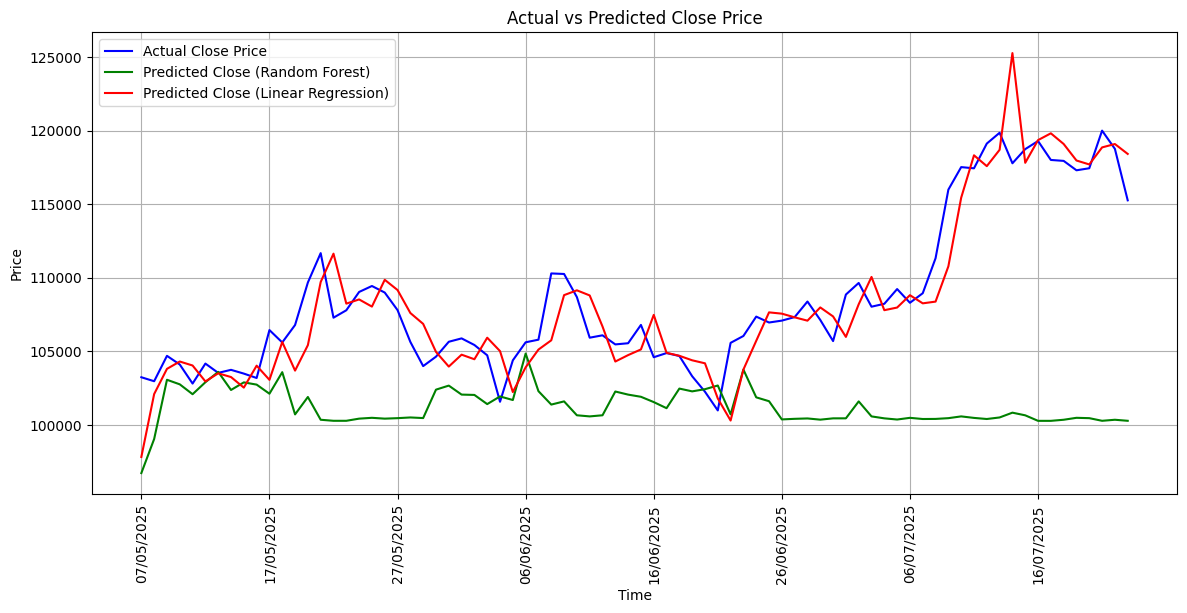

In [31]:
plt.figure(figsize=(14,6))

plt.plot(y_test.values, label='Actual Close Price', color='blue')
plt.plot(y_pred_rf, label='Predicted Close (Random Forest)', color='green')
plt.plot(y_pred_lr, label='Predicted Close (Linear Regression)', color='red')

plt.title('Actual vs Predicted Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
latest_data = stock[['Open', 'High', 'Low', 'Volume']].iloc[-1:]
predicted_close = rf.predict(latest_data)
print("Predicted next close price (Random Forest):", predicted_close[0])


Predicted next close price (Random Forest): 191.8368765258789
